In [1]:
%reset -f
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import geopandas as gpd
import contextily as cx
import matplotlib.colors as colors
%matplotlib inline

In [2]:
Licor = pd.read_csv('Licor.csv',header = [0],sep=",", parse_dates = [0]);
Airmar_GPS = pd.read_csv('AirMar_GPS.csv',header = [0],sep=",", parse_dates = [0]);
Aeris = pd.read_csv('Aeris.csv',header = [0],sep=",",parse_dates = [0] );
Car_GPS = pd.read_csv('GPS_car.csv',header = [0],sep=",",parse_dates = [0])

In [3]:
#Set the time as index
Licor = Licor.set_index(Licor['UTC']);
Airmar_GPS = Airmar_GPS.set_index(Airmar_GPS['Datetime_UTC'])
Aeris = Aeris.set_index(Aeris['Datetime'])
Car_GPS = Car_GPS.set_index(Car_GPS['date time'])

In [4]:
# Merge the Data based on time series:
merge_data_conc = pd.merge(Licor,Aeris,left_index=True, right_index=True)

# Merge with Car GPS:
Data = pd.merge(merge_data_conc,Car_GPS,left_index=True, right_index=True).rename(columns = 
                                                                                  {'latitude': 'latitude_car',
                                                                                   'longitude': 'longitude_car'})
Data

,UTC,H2O (ppm),CO2 (ppm),CH4 (ppb),Datetime,CH4 (ppm),H2O (ppm)_x,C2H6 (ppb),Latitude,Longitude,N2O (ppm),H2O (ppm)_y,CO (ppm),date time,latitude_car,longitude_car
2023-10-10 19:06:13,2023-10-10 19:06:13,9781.3525,472.06522,2147.2686,2023-10-10 19:06:13,2.20643,11884.8,11.3626,40.816853,-73.953751,0.373606,12528.8,0.604021,2023-10-10 19:06:13,40.816096,-73.954241
2023-10-10 19:06:14,2023-10-10 19:06:14,9778.8672,468.42670,2145.2708,2023-10-10 19:06:14,2.20784,11890.1,11.5976,40.816921,-73.953697,0.373320,12555.5,0.585878,2023-10-10 19:06:14,40.816170,-73.954187
2023-10-10 19:06:15,2023-10-10 19:06:15,9775.1719,478.06290,2147.1011,2023-10-10 19:06:15,2.20443,11894.2,11.1147,40.816990,-73.953644,0.371557,12548.4,0.571674,2023-10-10 19:06:15,40.816241,-73.954134
2023-10-10 19:06:19,2023-10-10 19:06:19,9791.6963,464.17505,2156.9204,2023-10-10 19:06:19,2.17987,11899.3,10.2237,40.817200,-73.953491,0.362659,12553.6,0.475422,2023-10-10 19:06:19,40.816528,-73.953922
2023-10-10 19:06:20,2023-10-10 19:06:20,9801.6689,463.93985,2160.8833,2023-10-10 19:06:20,2.18159,11886.5,10.3468,40.817268,-73.953445,0.360265,12551.8,0.452519,2023-10-10 19:06:20,40.816600,-73.953868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-10 21:28:02,2023-10-10 21:28:02,8613.7119,457.25912,2078.5359,2023-10-10 21:28:02,2.13261,10208.6,10.9377,40.811172,-73.963814,0.342245,10587.1,0.245305,2023-10-10 21:28:02,40.811153,-73.963775
2023-10-10 21:28:03,2023-10-10 21:28:03,8613.5049,457.94287,2078.5405,2023-10-10 21:28:03,2.13439,10213.3,10.8689,40.811172,-73.963814,0.342387,10596.7,0.245887,2023-10-10 21:28:03,40.811153,-73.963775
2023-10-10 21:28:04,2023-10-10 21:28:04,8614.7441,458.72827,2078.5566,2023-10-10 21:28:04,2.13336,10217.0,10.7956,40.811169,-73.963814,0.342654,10617.1,0.246055,2023-10-10 21:28:04,40.811153,-73.963775
2023-10-10 21:28:05,2023-10-10 21:28:05,8615.8467,458.09589,2078.4033,2023-10-10 21:28:05,2.13360,10214.8,10.7275,40.811169,-73.963821,0.342385,10575.3,0.246233,2023-10-10 21:28:05,40.811153,-73.963775


Text(0.5, 1.0, 'Licor and Aeris CH4 ')

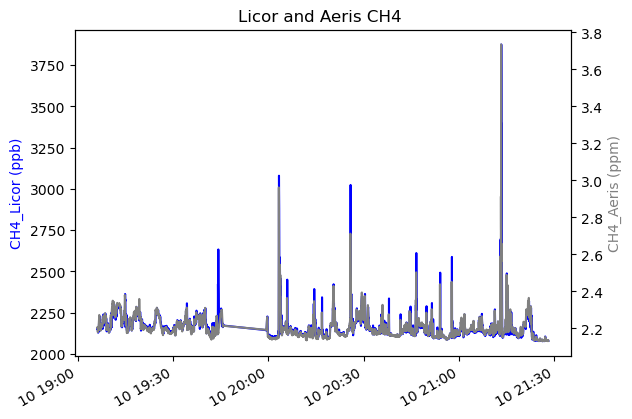

In [5]:
# Check the merge
# Check if the data merge is working:
fig, ax = plt.subplots()
ax2 = ax.twinx()
Data['CH4 (ppb)'].plot(ax = ax, label = 'CH4_Licor (ppb)',color = 'blue',fontsize = 10);
Data['CH4 (ppm)'].plot(ax = ax2, label = 'CH4_Aeris (ppm)',color = 'grey',fontsize = 10);

ax.set_ylabel('CH4_Licor (ppb)', color = 'blue',fontsize = 10)
ax2.set_ylabel('CH4_Aeris (ppm)',color = 'grey',fontsize = 10)
plt.title('Licor and Aeris CH4 ')

In [6]:
# Select the data
#Data_region = Data[(Data.index>'2023-10-10 19:00:00')&(Data.index<'2023-10-10 20:10:00')]
Data_region = Data[(Data.index>'2023-10-10 20:10:00')&(Data.index<'2023-10-10 21:10:00')]

C:\Users\yuwei\AppData\Local\Temp\ipykernel_15388\2041109345.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_region['CH4 Licor bg'] =  Data_region['CH4 (ppb)'].rolling(rolling_factor,center = True, min_periods =1).quantile(0.05)
C:\Users\yuwei\AppData\Local\Temp\ipykernel_15388\2041109345.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_region['CH4 Licor Enhance'] = Data_region['CH4 (ppb)'] - Data_region['CH4 Licor bg']


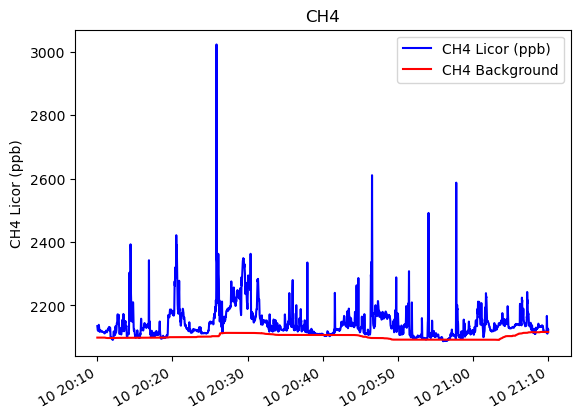

In [8]:
# Apply Background Calculation
Rolling_Window = 15 # in mins
rolling_factor = 60*Rolling_Window
Data_region['CH4 Licor bg'] =  Data_region['CH4 (ppb)'].rolling(rolling_factor,center = True, min_periods =1).quantile(0.05)

##Plot the Background
fig, ax = plt.subplots()
Data_region['CH4 (ppb)'].plot(ax = ax, label = 'CH4 Licor (ppb)',color = 'blue',fontsize = 10);
Data_region['CH4 Licor bg'].plot(ax = ax, label = 'CH4 Background', color = 'red',fontsize = 10)
plt.ylabel('CH4 Licor (ppb)')
plt.legend()
plt.title('CH4')

## Calculate and plot the enhancement
Data_region['CH4 Licor Enhance'] = Data_region['CH4 (ppb)'] - Data_region['CH4 Licor bg']
#


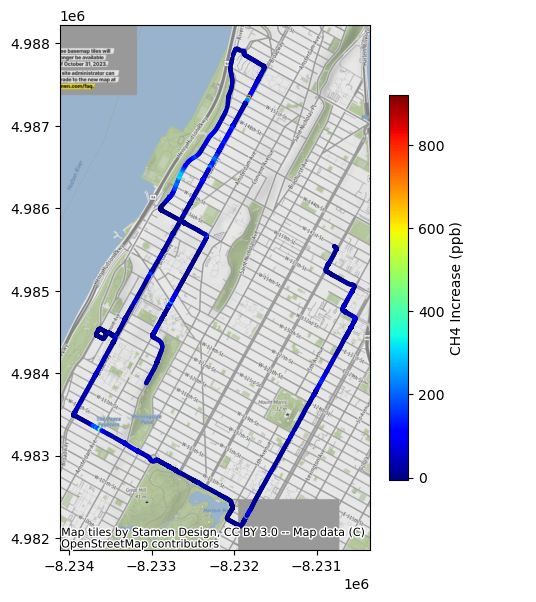

In [10]:
merge_gdp = gpd.GeoDataFrame(Data_region, geometry = gpd.points_from_xy(Data_region['longitude_car'],Data_region['latitude_car']),crs='EPSG:4326')
#Plot preview
fig, ax = plt.subplots(figsize=(5, 10))
ax = merge_gdp.to_crs('EPSG:3857').plot(column = 'CH4 Licor Enhance',ax = ax, legend = True,cmap = 'jet',markersize = 5,
                                        legend_kwds={'shrink': 0.5,'label':'CH4 Increase (ppb)'},
                                       )
a = cx.add_basemap(ax)